In [1]:
import numpy as np
import matplotlib.pyplot as pltimport
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

In [11]:
def compare_PCA_tSNE(title, X, y, subset_size = None, seed = 42, n_components = 2, perplexity = 30, labels = None):
    
    np.random.seed(seed)

    if subset_size:
        idx = np.random.choice(range(X.shape[0]), size=subset_size, replace=False)
        X = X.iloc[idx]
        y = y.iloc[idx]

    # Apply PCA and t-SNE
    pca = PCA(n_components = n_components)
    X_pca = pca.fit_transform(X)

    tsne = TSNE(n_components = n_components, perplexity = perplexity, max_iter = 1000, random_state=seed)
    X_tsne = tsne.fit_transform(X)

    # Plot PCA and t-SNE for comparison
    fig, axs = plt.subplots(1, 2, figsize=(18,10))
    
    scatter1 = axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y.astype(int), cmap='tab10', s=1)
    axs[0].set_title('Principal Component Analysis (PCA) of '+title)
    axs[0].set_xlabel('Principal Component 1')
    axs[0].set_ylabel('Principal Component 2')

    scatter2 = axs[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.astype(int), cmap='tab10', s=1)
    
    if labels:
        handles, _ = scatter1.legend_elements()
        axs[0].legend(handles, labels, loc = 'upper right')
        handles, _ = scatter2.legend_elements()
        axs[1].legend(handles, labels, loc = 'upper right')
    else:
        axs[0].legend(*scatter1.legend_elements())
        axs[1].legend(*scatter2.legend_elements())
    
    axs[1].set_title('t-distributed Stochastic Neighbour Embedding (t-SNE) of '+title)
    plt.show()
    

In [10]:
def tSNE_3D(X, y, subset_size = None, seed = 42, perplexity = 30, labels = None):
    
    np.random.seed(seed)

    if subset_size:
        idx = np.random.choice(range(X.shape[0]), size=subset_size, replace=False)
        X = X.iloc[idx]
        y = y.iloc[idx]

    tsne = TSNE(n_components = 3, perplexity = perplexity, max_iter = 1000, random_state=seed)
    X_tsne = tsne.fit_transform(X)

    # 3D interactive plot using plotly
    
    fig = px.scatter_3d(x=X_tsne[:,0], y=X_tsne[:,1], z=X_tsne[:,2], size_max = .5, color = y, symbol = y, opacity=0.7)
    fig.show(renderer = 'browser')

### Comparing PCA and t-SNE of MNIST

In [5]:
seed = 42
subset_size = 10000

mnist = fetch_openml('mnist_784', version=1)
X_mnist = mnist.data / 255.0
y_mnist = mnist.target

print('Shape of X:', X_mnist.shape)
print('Shape of y:', y_mnist.shape)

Shape of X: (70000, 784)
Shape of y: (70000,)


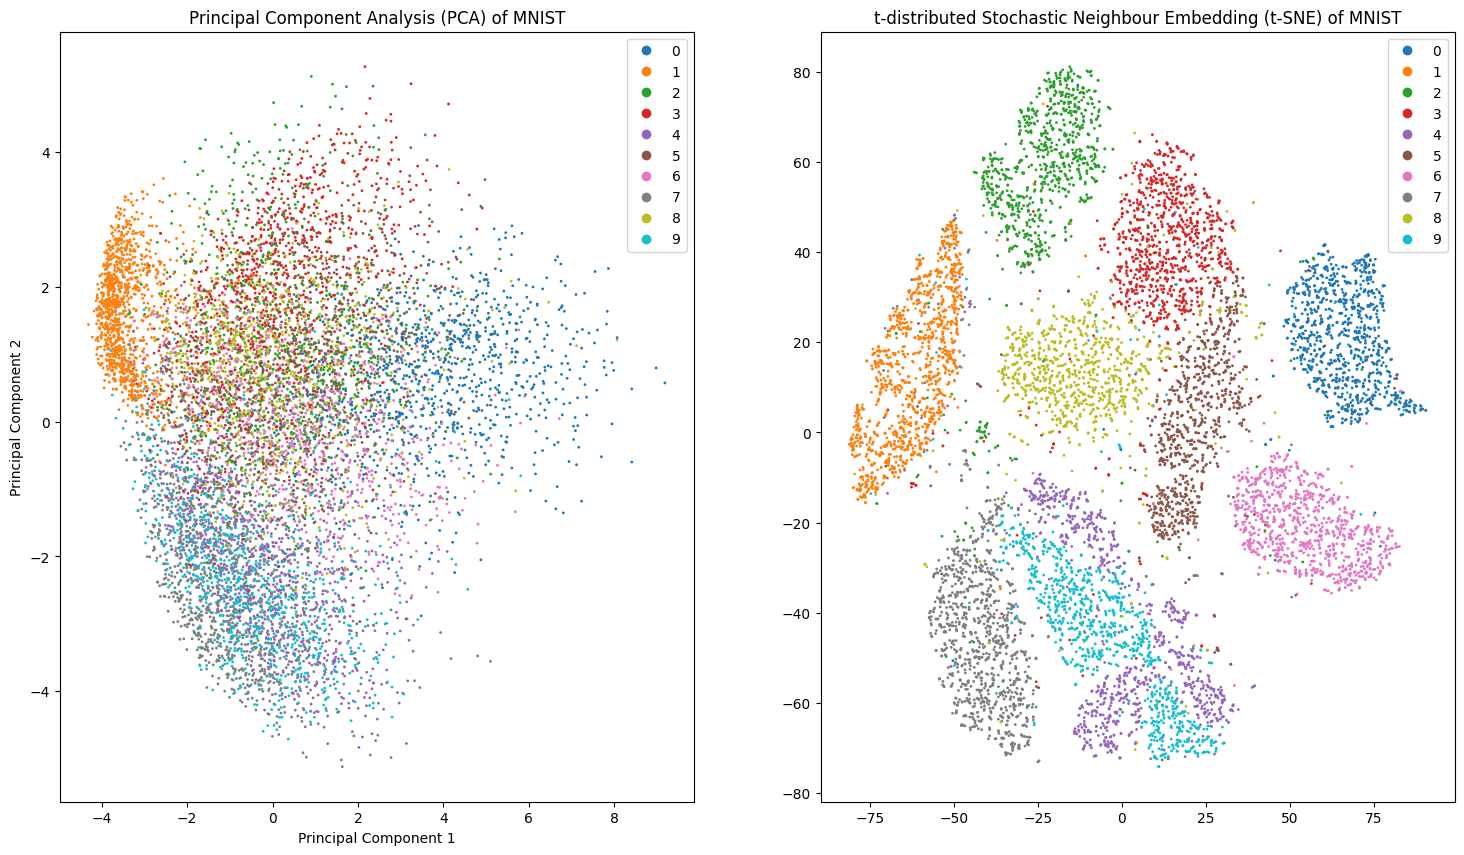

In [6]:
compare_PCA_tSNE('MNIST', X_mnist, y_mnist, subset_size = 10000)

### Comparing PCA and t-SNE of Data on Human Activity Recognition

In [7]:
df = pd.read_csv("HumanActivityRecognition_data.csv")
X_har = df.iloc[:,:-2]
y_har = df.iloc[:,-1]

print('Shape of X:', X_har.shape)
print('Shape of y:', y_har.shape)

Shape of X: (2947, 561)
Shape of y: (2947,)


In [12]:
mapper = {'STANDING': 1, 'SITTING': 2, 'LAYING': 3, 'WALKING': 4, 'WALKING_DOWNSTAIRS': 5, 'WALKING_UPSTAIRS': 6}
labels = ['STANDING','SITTING','LAYING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

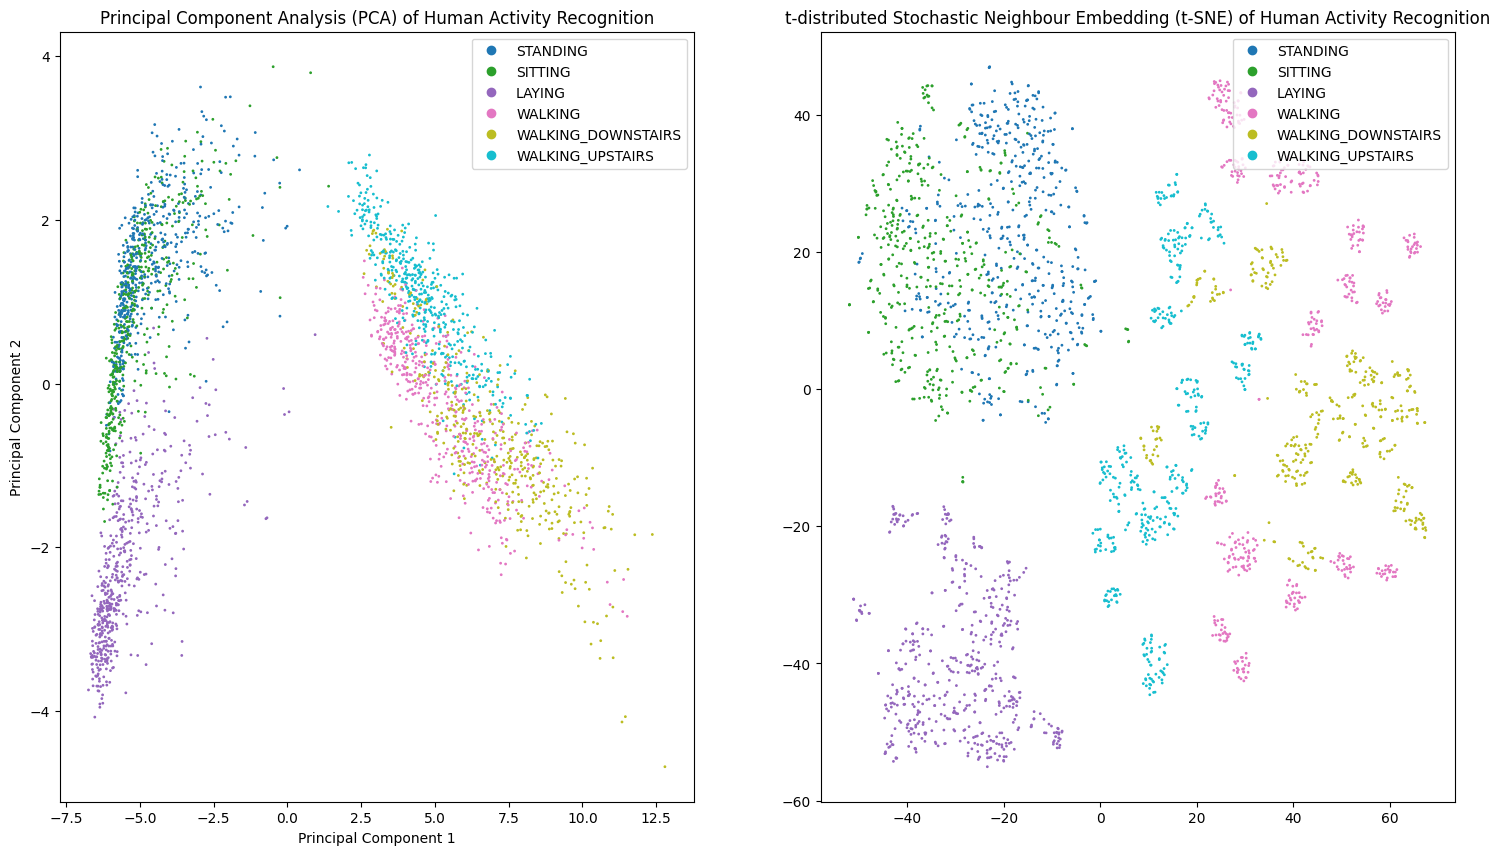

In [13]:
compare_PCA_tSNE('Human Activity Recognition', X_har, y_har.map(mapper), labels = labels, perplexity = 30)

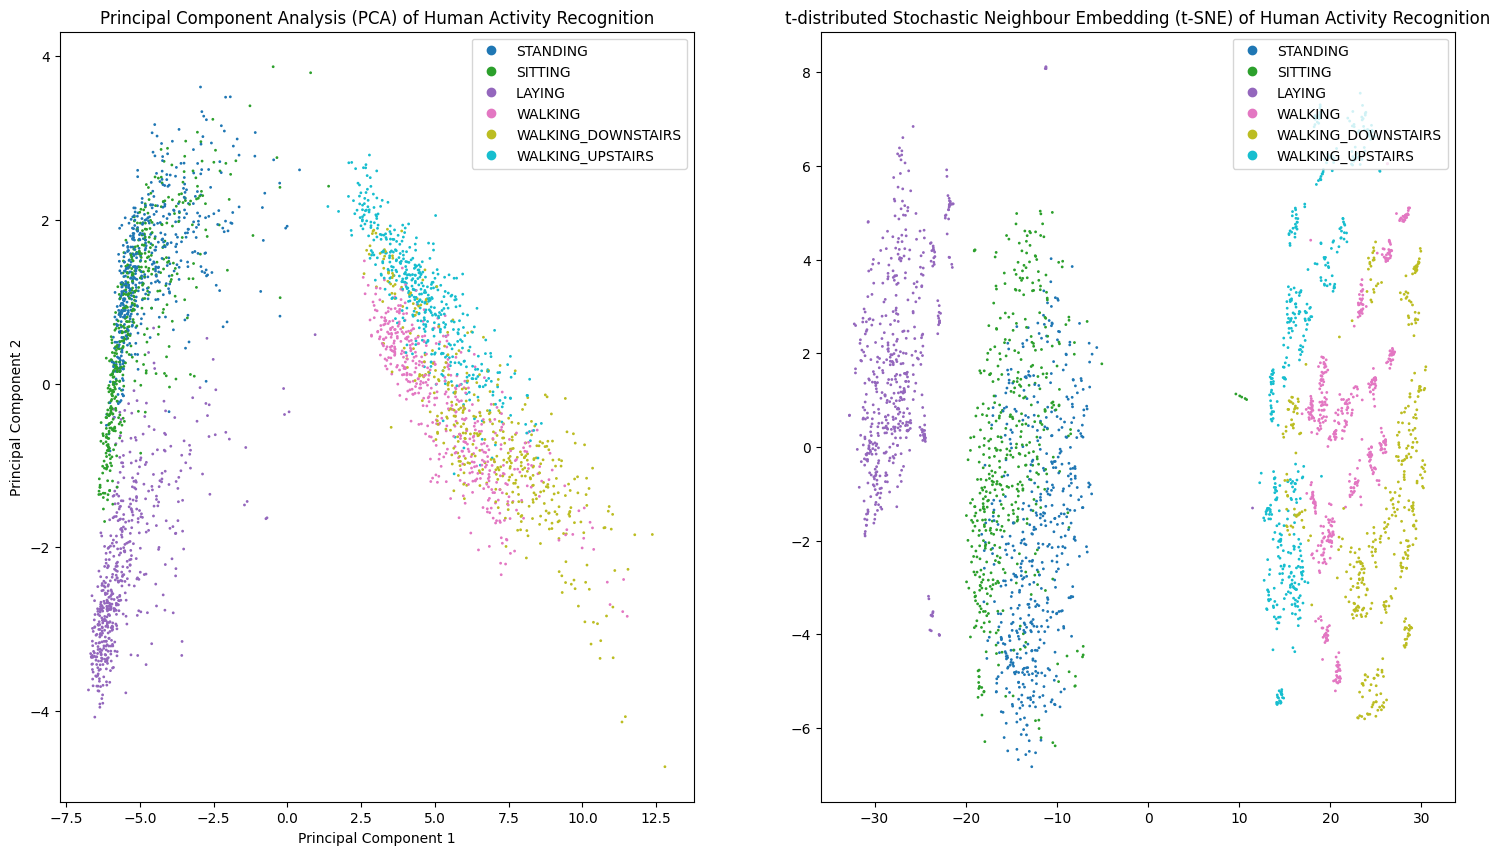

In [14]:
compare_PCA_tSNE('Human Activity Recognition', X_har, y_har.map(mapper), labels = labels, perplexity = 300)

## Ploting 3D t-SNE visualisation of Data on Human Activity Recognition

In [15]:
tSNE_3D(X_har, y_har)

In [16]:
tSNE_3D(X_har, y_har, perplexity = 300)